In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install --upgrade mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.8 MB/s eta 0:00:00


In [ ]:
# Basic libraries
import numpy as np
import pandas as pd
import warnings
import tensorflow as tf


warnings.filterwarnings("ignore")

# For processing
import math
import random
import datetime as dt
import matplotlib.dates as mdates

# For visualization
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc

# Libraries for model training
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error

In [ ]:
# Reading our datasets
datasetAAPL = pd.read_csv('/content/drive/MyDrive/DATA/AAPL.csv', parse_dates=['Date'], dayfirst=True)
datasetAAPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.009060,270597600
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.407413,223164000
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,22.949333,273829600
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,21.980772,324377600
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.097002,283192000


In [ ]:
datasetAMD = pd.read_csv('/content/drive/MyDrive/DATA/AMD.csv', parse_dates=['Date'], dayfirst=True)
datasetAMD.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,2.77,2.82,2.63,2.77,2.77,32516800
1,2016-01-05,2.77,2.80,2.64,2.75,2.75,12972300
2,2016-01-06,2.66,2.71,2.47,2.51,2.51,23759400
3,2016-01-07,2.43,2.48,2.26,2.28,2.28,22203500
4,2016-01-08,2.36,2.42,2.10,2.14,2.14,31822400


In [ ]:
datasetGOOGL = pd.read_csv('/content/drive/MyDrive/DATA/GOOGL.csv', parse_dates=['Date'], dayfirst=True)
datasetGOOGL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,38.110001,38.110001,37.376999,37.972000,37.972000,67382000
1,2016-01-05,38.205002,38.459999,37.782501,38.076500,38.076500,45216000
2,2016-01-06,37.518501,38.286499,37.400002,37.966499,37.966499,48206000
3,2016-01-07,37.324501,37.765499,36.764000,37.049999,37.049999,63132000
4,2016-01-08,37.389999,37.506001,36.445999,36.545502,36.545502,47506000


In [ ]:
datasetNVDA = pd.read_csv('/content/drive/MyDrive/DATA/NVDA.csv', parse_dates=['Date'], dayfirst=True)
datasetNVDA.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,8.0725,8.1450,8.0100,8.0925,7.900972,35807600
1,2016-01-05,8.2450,8.3600,8.1250,8.2225,8.027894,49027200
2,2016-01-06,8.0875,8.1250,7.7900,7.8825,7.695941,44934400
3,2016-01-07,7.6850,7.7375,7.4700,7.5700,7.390839,64530400
4,2016-01-08,7.6675,7.6750,7.3925,7.4075,7.232183,39847200


In [ ]:
datasetTEAM = pd.read_csv('/content/drive/MyDrive/DATA/TEAM.csv', parse_dates=['Date'], dayfirst=True)
datasetTEAM.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,28.940001,29.030001,27.200001,27.410000,27.410000,1312000
1,2016-01-05,27.910000,28.000000,26.270000,26.770000,26.770000,917700
2,2016-01-06,26.459999,27.230000,26.020000,27.049999,27.049999,619000
3,2016-01-07,26.549999,27.319000,26.459999,26.969999,26.969999,661500
4,2016-01-08,27.059999,27.760000,26.930000,27.170000,27.170000,455900


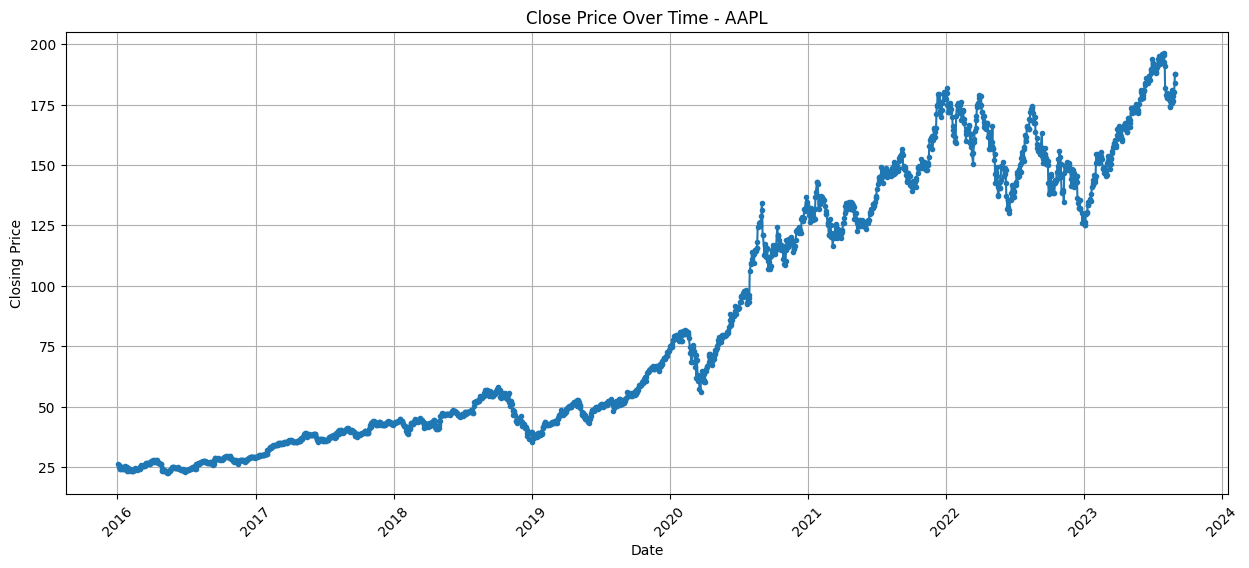

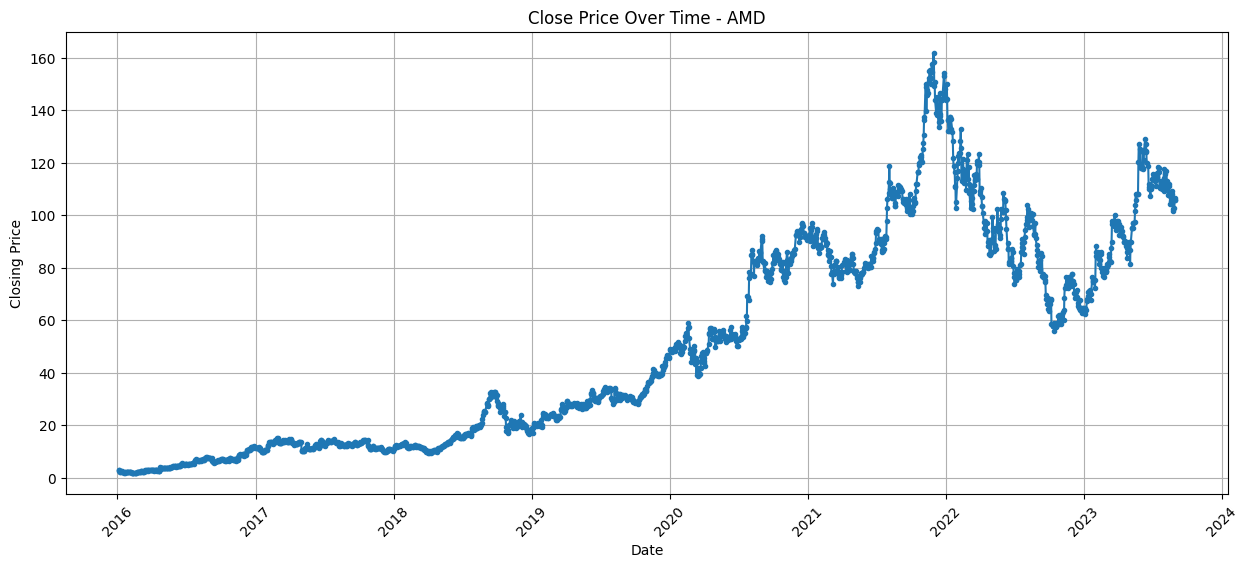

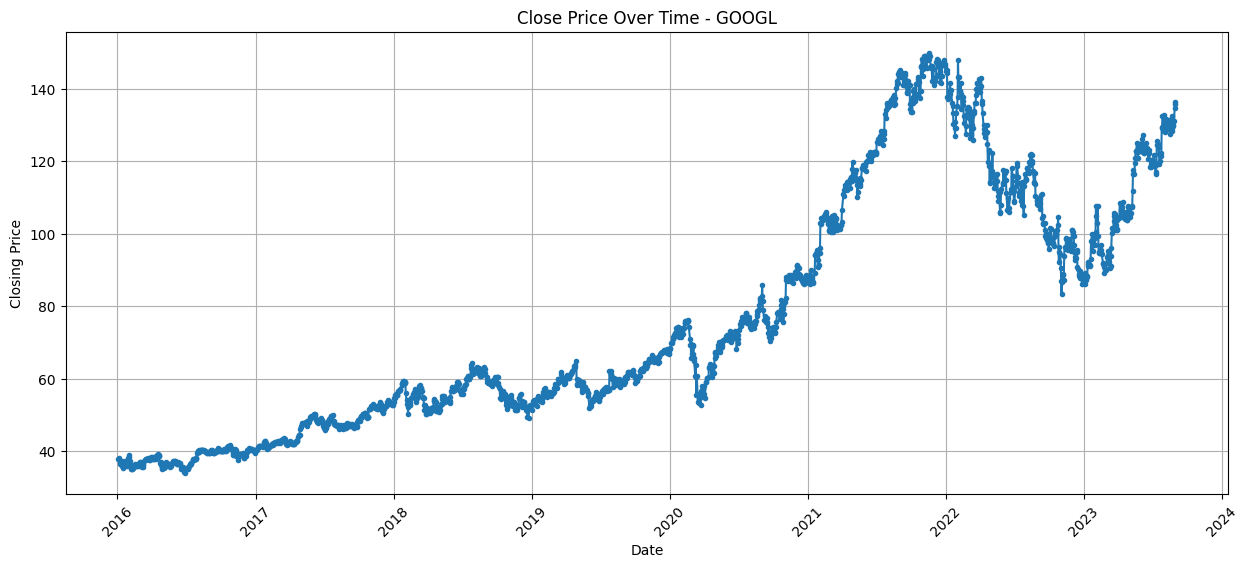

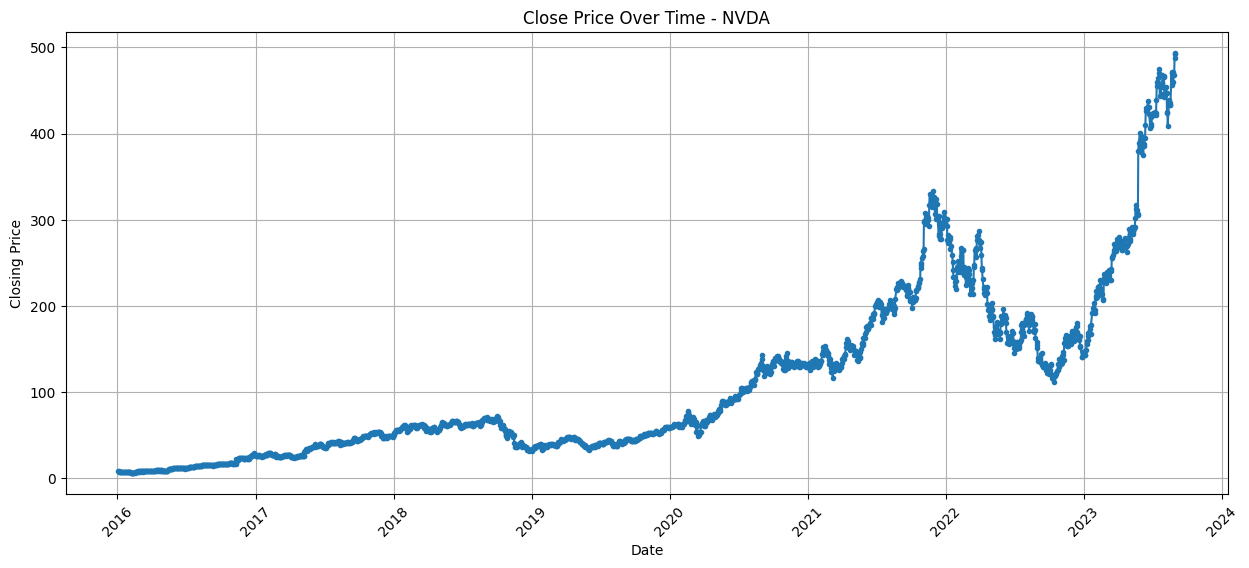

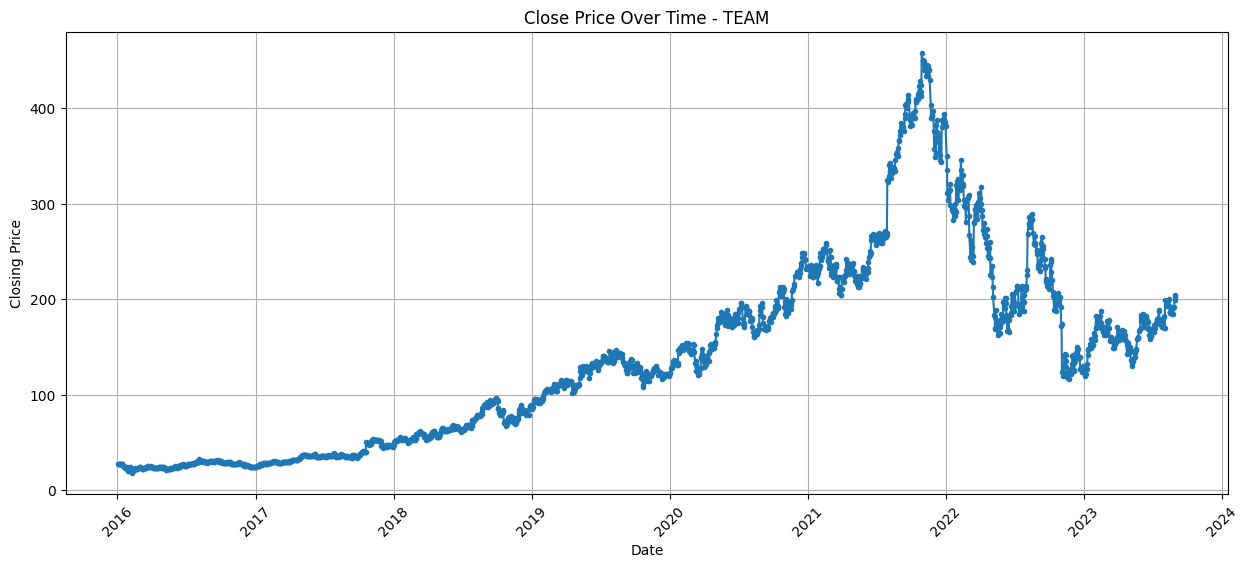

In [ ]:
# Line Chart of Closing Prices Over Time

# Define a function to plot closing prices
def plot_closing_prices(dataset, title):
    dataset['Date'] = pd.to_datetime(dataset['Date'])

    plt.figure(figsize=(15, 6))
    plt.plot(dataset['Date'], dataset['Close'], marker='.')
    plt.title(f'Close Price Over Time - {title}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Example usage for multiple datasets
datasets = [(datasetAAPL, 'AAPL'), (datasetAMD, 'AMD'), (datasetGOOGL, 'GOOGL'), (datasetNVDA, 'NVDA'), (datasetTEAM, 'TEAM')]

for data, title in datasets:
    plot_closing_prices(data, title)

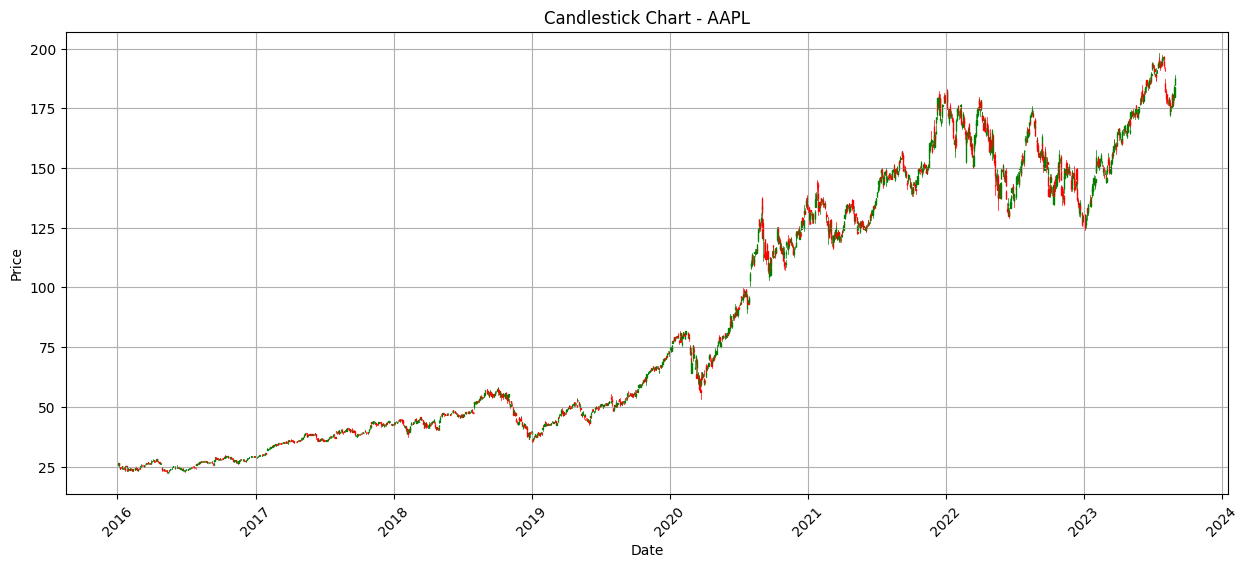

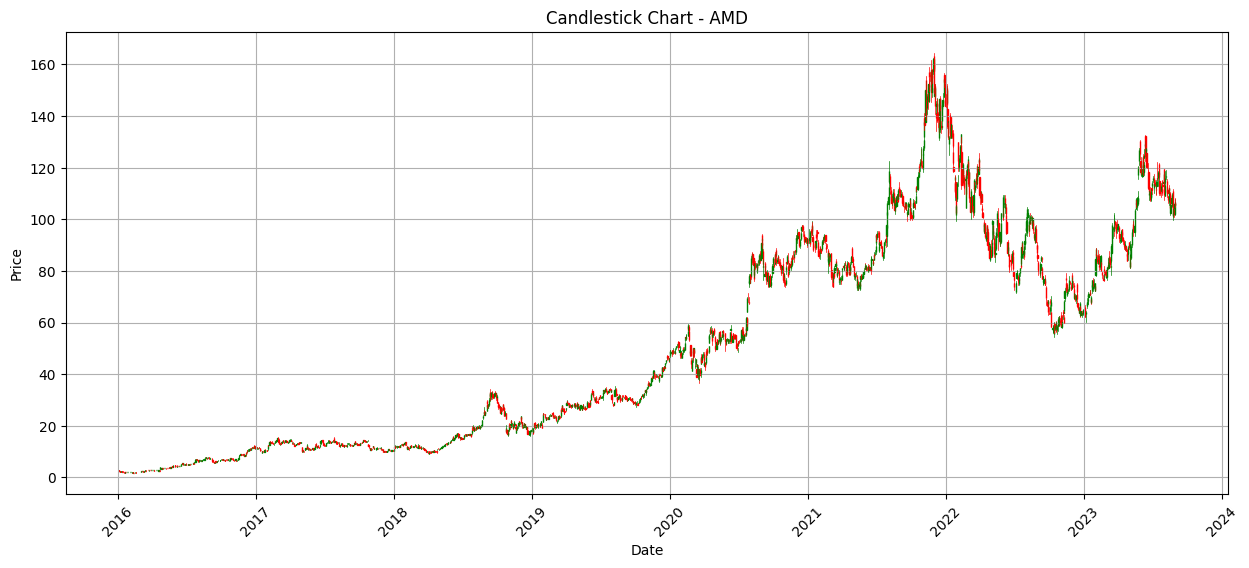

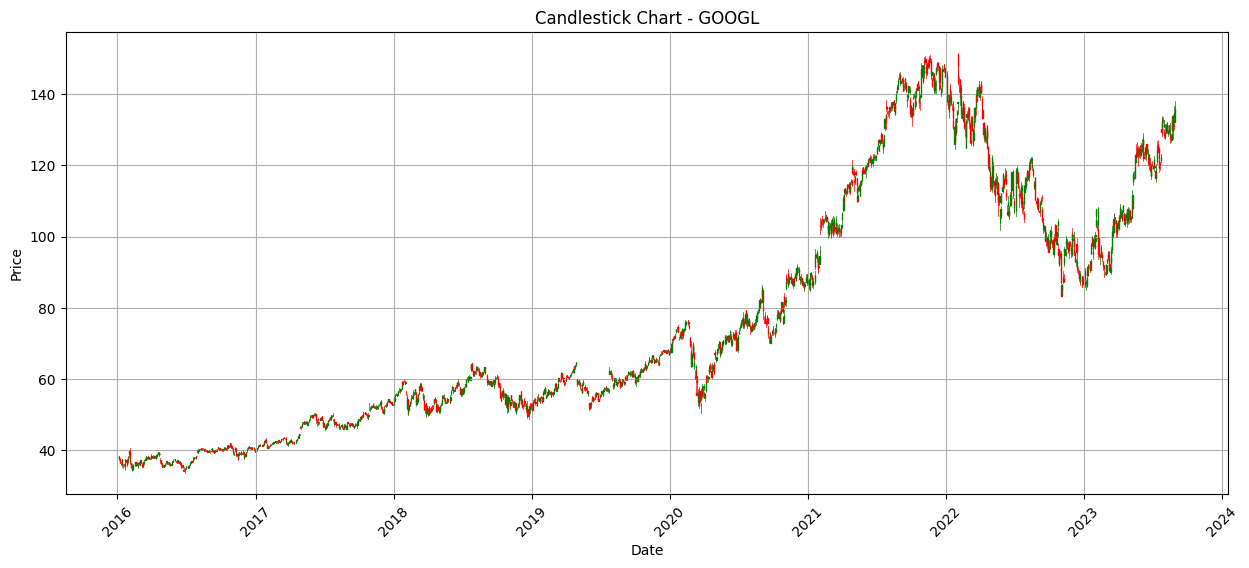

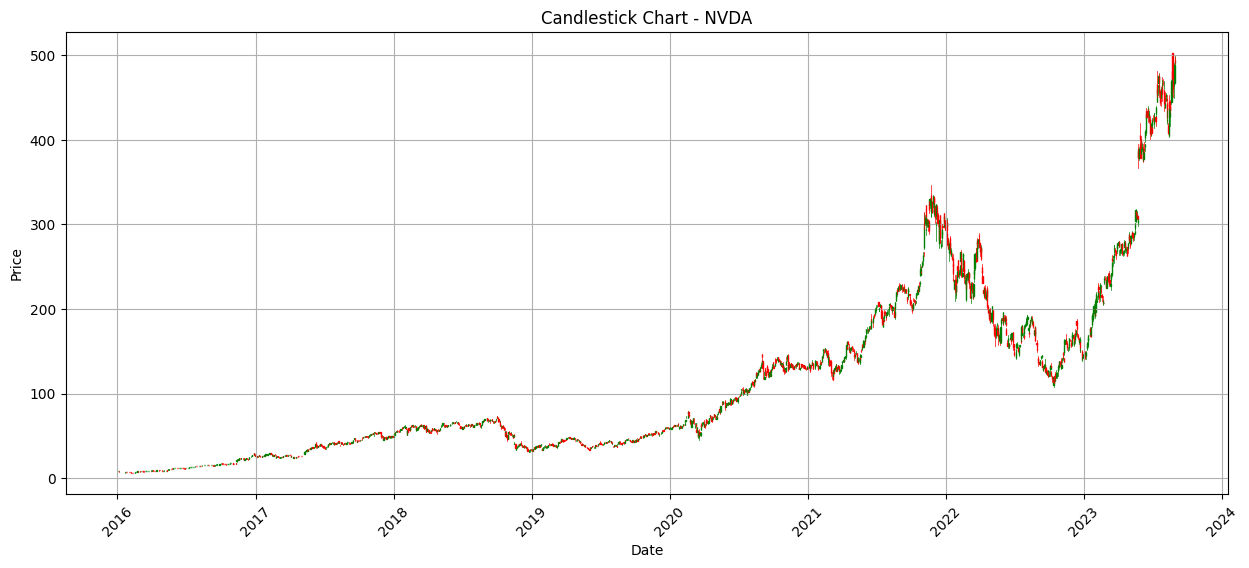

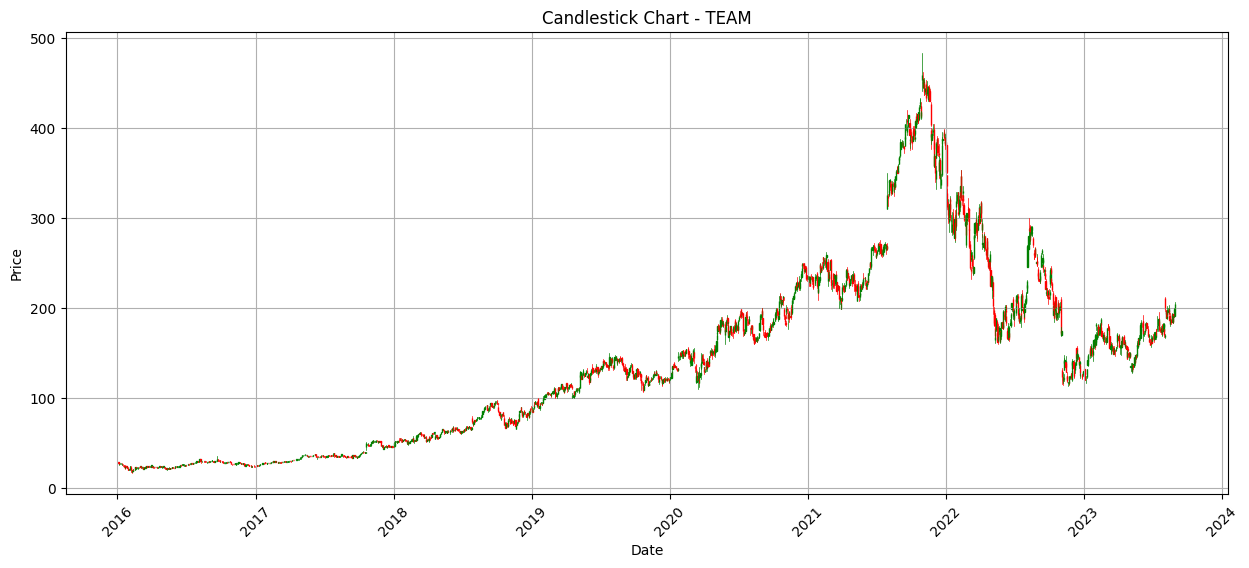

In [ ]:
# # Candlestick

# Define a function to plot candlestick charts
def plot_candlestick(dataset, title):
    # Convert 'Date' column to matplotlib date format
    matplotlib_date = mdates.date2num(dataset['Date'])

    # Create an array of tuples in the required format
    ohlc = np.vstack((matplotlib_date, dataset['Open'], dataset['High'], dataset['Low'], dataset['Close'])).T

    # Create a new figure and subplot
    plt.figure(figsize=(15, 6))
    ax = plt.subplot()

    # Plot the candlestick chart
    candlestick_ohlc(ax, ohlc, width=0.6, colorup='g', colordown='r')

    ax.xaxis_date()
    plt.title(f'Candlestick Chart - {title}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Example usage for multiple datasets
datasets = [(datasetAAPL, 'AAPL'), (datasetAMD, 'AMD'), (datasetGOOGL, 'GOOGL'), (datasetNVDA, 'NVDA'),(datasetTEAM, 'TEAM')]

for data, title in datasets:
    plot_candlestick(data, title)

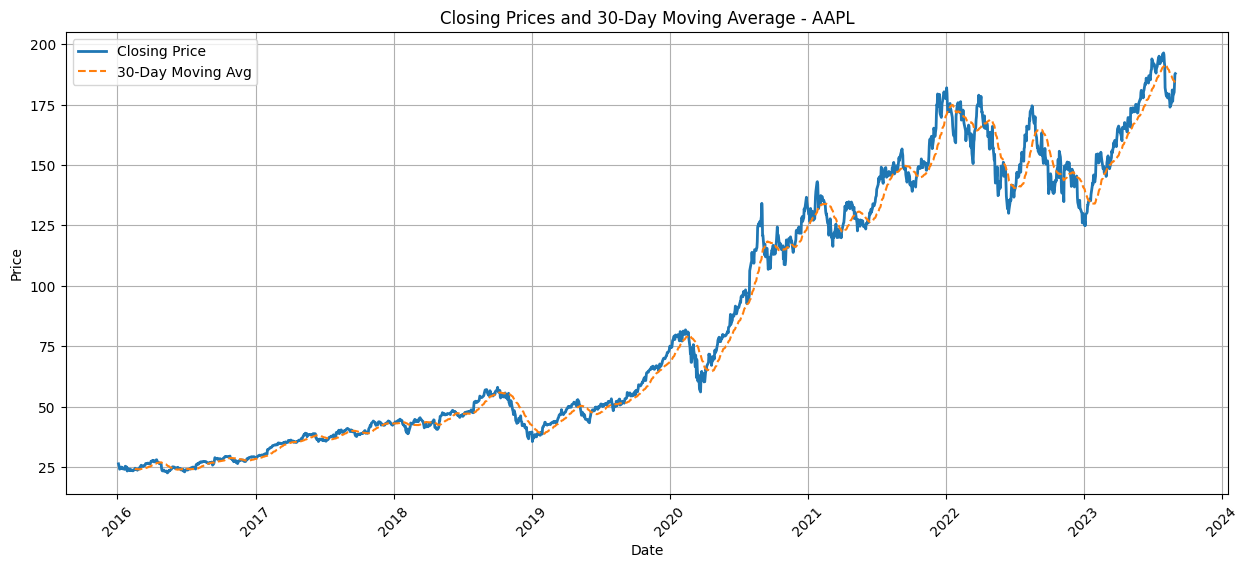

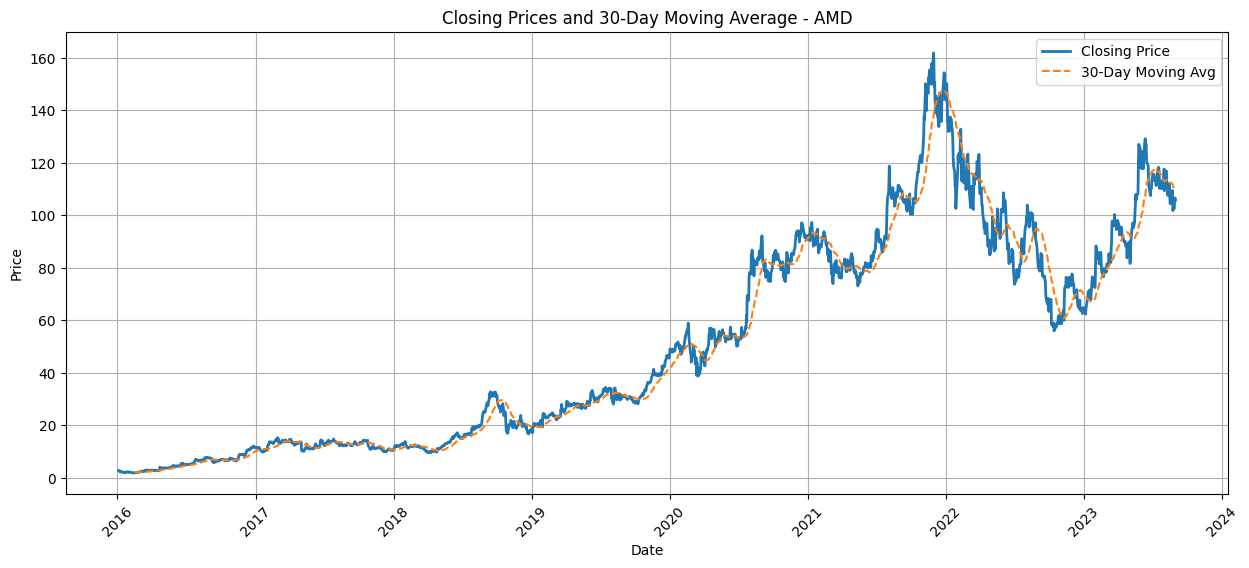

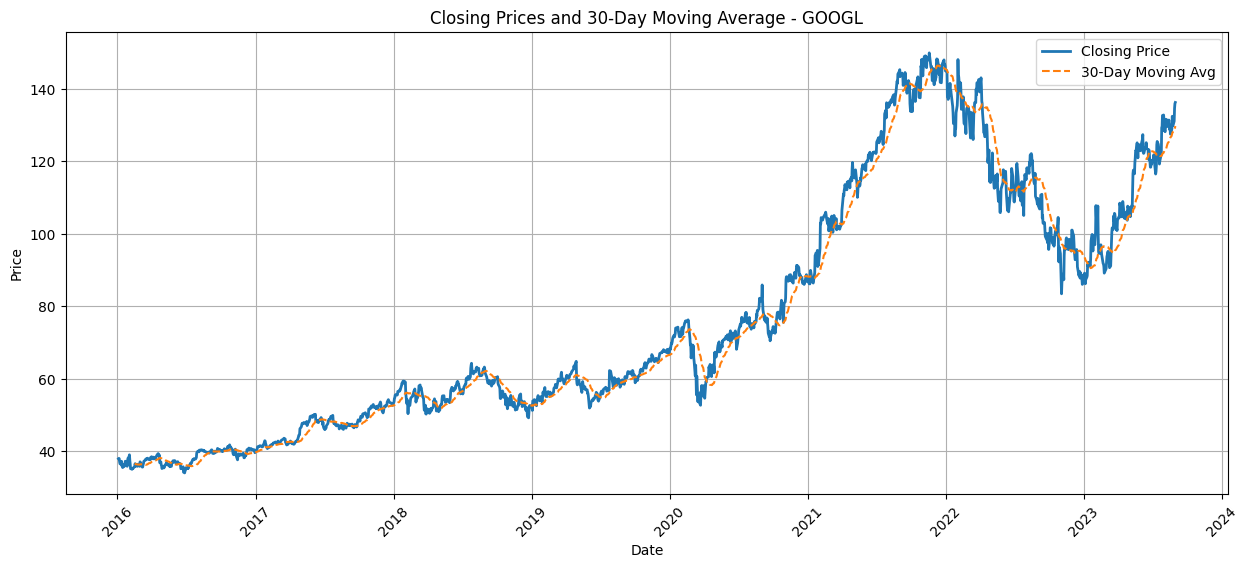

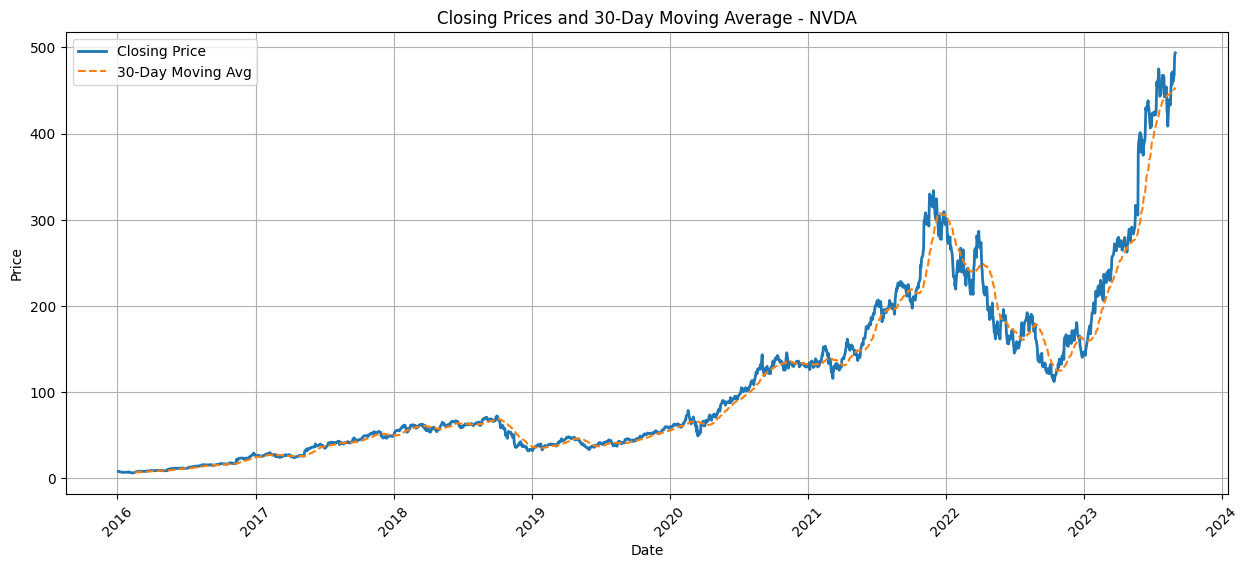

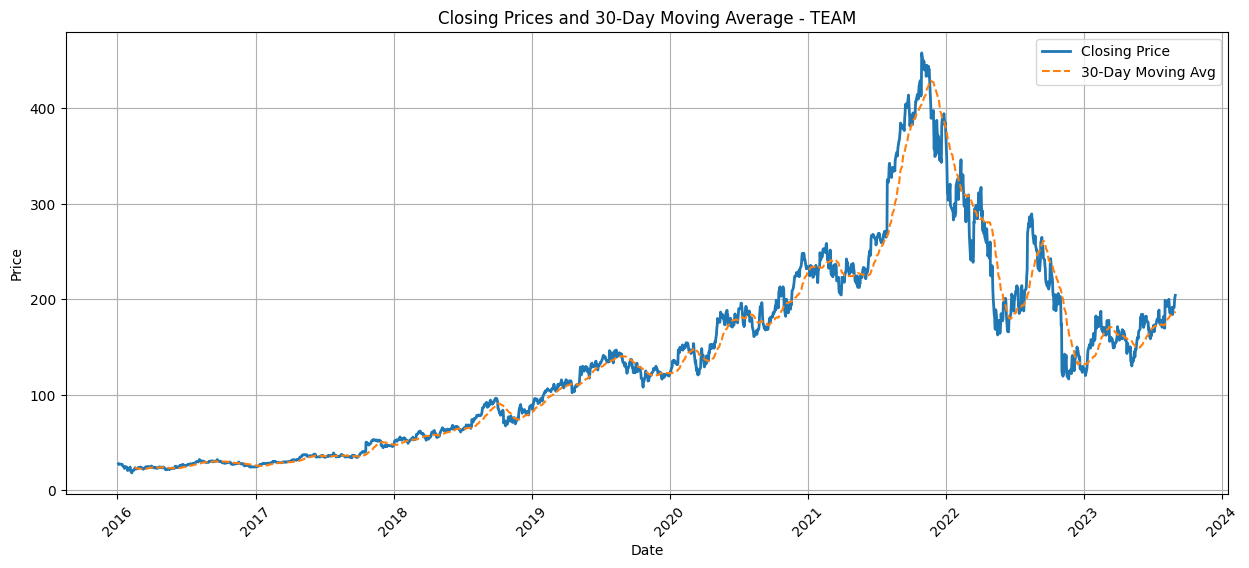

In [ ]:
# Plotting of Closing Price against 30-Day Moving Average (30DMA)

# Define function to plot Closing Price against 30DMA
def plot_closing_price_and_moving_average(dataset, symbol, window=30):
    plt.figure(figsize=(15, 6))
    plt.plot(dataset['Date'], dataset['Close'], label='Closing Price', linewidth=2)
    plt.plot(dataset['Date'], dataset['Close'].rolling(window=window).mean(), label=f'{window}-Day Moving Avg', linestyle='--')
    plt.title(f'Closing Prices and {window}-Day Moving Average - {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage for multiple datasets
datasets = [(datasetAAPL, 'AAPL'), (datasetAMD, 'AMD'), (datasetGOOGL, 'GOOGL'), (datasetNVDA, 'NVDA'), (datasetTEAM, 'TEAM')]

for data, symbol in datasets:
    plot_closing_price_and_moving_average(data, symbol)

In [ ]:
display(datasetAAPL.head())
display(datasetAMD.head())
display(datasetGOOGL.head())
display(datasetNVDA.head())
display(datasetTEAM.head())

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.009060,270597600
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.407413,223164000
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,22.949333,273829600
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,21.980772,324377600
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.097002,283192000


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,2.77,2.82,2.63,2.77,2.77,32516800
1,2016-01-05,2.77,2.80,2.64,2.75,2.75,12972300
2,2016-01-06,2.66,2.71,2.47,2.51,2.51,23759400
3,2016-01-07,2.43,2.48,2.26,2.28,2.28,22203500
4,2016-01-08,2.36,2.42,2.10,2.14,2.14,31822400


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,38.110001,38.110001,37.376999,37.972000,37.972000,67382000
1,2016-01-05,38.205002,38.459999,37.782501,38.076500,38.076500,45216000
2,2016-01-06,37.518501,38.286499,37.400002,37.966499,37.966499,48206000
3,2016-01-07,37.324501,37.765499,36.764000,37.049999,37.049999,63132000
4,2016-01-08,37.389999,37.506001,36.445999,36.545502,36.545502,47506000


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,8.0725,8.1450,8.0100,8.0925,7.900972,35807600
1,2016-01-05,8.2450,8.3600,8.1250,8.2225,8.027894,49027200
2,2016-01-06,8.0875,8.1250,7.7900,7.8825,7.695941,44934400
3,2016-01-07,7.6850,7.7375,7.4700,7.5700,7.390839,64530400
4,2016-01-08,7.6675,7.6750,7.3925,7.4075,7.232183,39847200


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,28.940001,29.030001,27.200001,27.410000,27.410000,1312000
1,2016-01-05,27.910000,28.000000,26.270000,26.770000,26.770000,917700
2,2016-01-06,26.459999,27.230000,26.020000,27.049999,27.049999,619000
3,2016-01-07,26.549999,27.319000,26.459999,26.969999,26.969999,661500
4,2016-01-08,27.059999,27.760000,26.930000,27.170000,27.170000,455900


In [ ]:
def preprocess_dataset(dataset):
    return dataset.reset_index()['Close']

new_datasetAAPL = preprocess_dataset(datasetAAPL)
new_datasetAMD = preprocess_dataset(datasetAMD)
new_datasetGOOGL = preprocess_dataset(datasetGOOGL)
new_datasetNVDA = preprocess_dataset(datasetNVDA)
new_datasetTEAM = preprocess_dataset(datasetTEAM)


In [ ]:
# Normalizing our data using MinMaxScaler
scaler = MinMaxScaler()
def scale_dataset(dataset):

    scaled_dataset = scaler.fit_transform(np.array(dataset).reshape(-1, 1))
    return scaled_dataset

scaled_datasetAAPL = scale_dataset(new_datasetAAPL)
scaled_datasetAMD = scale_dataset(new_datasetAMD)
scaled_datasetGOOGL = scale_dataset(new_datasetGOOGL)
scaled_datasetNVDA = scale_dataset(new_datasetNVDA)
scaled_datasetTEAM = scale_dataset(new_datasetTEAM)

In [ ]:
# Split into training and testing sets
def split_dataset(dataset, split_ratio=0.8):
    train_size = int(len(dataset) * split_ratio)
    train_data, test_data = dataset[:train_size], dataset[train_size:]
    return train_data, test_data

train_data_AAPL, test_data_AAPL = split_dataset(datasetAAPL)
train_data_AMD, test_data_AMD = split_dataset(datasetAMD)
train_data_GOOGL, test_data_GOOGL = split_dataset(datasetGOOGL)
train_data_NVDA, test_data_NVDA = split_dataset(datasetNVDA)
train_data_TEAM, test_data_TEAM = split_dataset(datasetTEAM)

In [ ]:
def prepare_sequences(dataset, n_past, target_col='Close'):
    X, y = [], []

    # Check if the dataset has enough data points
    if len(dataset) >= n_past:
        for i in range(n_past, len(dataset)):
            X.append(dataset[target_col].iloc[i - n_past:i].values)
            y.append(dataset[target_col].iloc[i])
        X, y = np.array(X), np.array(y)
        return X, y
    else:
        raise ValueError("Dataset does not have enough data points for the specified sequence length.")



n_past = 60  # Define the sequence length (number of past time steps)

# Assuming your datasets are Pandas DataFrames, modify the following lines accordingly
# For example: train_data_AAPL, test_data_AAPL should be Pandas DataFrames

try:
    X_train_AAPL, y_train_AAPL = prepare_sequences(train_data_AAPL, n_past)
    X_test_AAPL, y_test_AAPL = prepare_sequences(test_data_AAPL, n_past)

    X_train_AMD, y_train_AMD = prepare_sequences(train_data_AMD, n_past)
    X_test_AMD, y_test_AMD = prepare_sequences(test_data_AMD, n_past)

    X_train_GOOGL, y_train_GOOGL = prepare_sequences(train_data_GOOGL, n_past)
    X_test_GOOGL, y_test_GOOGL = prepare_sequences(test_data_GOOGL, n_past)

    X_train_NVDA, y_train_NVDA = prepare_sequences(train_data_NVDA, n_past)
    X_test_NVDA, y_test_NVDA = prepare_sequences(test_data_NVDA, n_past)

    X_train_TEAM, y_train_TEAM = prepare_sequences(train_data_TEAM, n_past)
    X_test_TEAM, y_test_TEAM = prepare_sequences(test_data_TEAM, n_past)
except ValueError as e:
    print(e)


In [ ]:
# Define a list of stock symbols and their corresponding data
stocks = [("AAPL", X_train_AAPL, y_train_AAPL, X_test_AAPL, y_test_AAPL),
          ("AMD", X_train_AMD, y_train_AMD, X_test_AMD, y_test_AMD),
          ("GOOGL", X_train_GOOGL, y_train_GOOGL, X_test_GOOGL, y_test_GOOGL),
          ("NVDA", X_train_NVDA, y_train_NVDA, X_test_NVDA, y_test_NVDA),
          ("TEAM", X_train_TEAM, y_train_TEAM, X_test_TEAM, y_test_TEAM)]

# Iterate through the list of stocks and print the set sizes
for stock, X_train, y_train, X_test, y_test in stocks:
    print(f"Training set size - {stock}:-")
    print(X_train.shape, y_train.shape)
    print("\n")
    print(f"Testing set size - {stock}:-")
    print(X_test.shape, y_test.shape)
    print("\n")


Training set size - AAPL:-
(1483, 60) (1483,)


Testing set size - AAPL:-
(326, 60) (326,)


Training set size - AMD:-
(1483, 60) (1483,)


Testing set size - AMD:-
(326, 60) (326,)


Training set size - GOOGL:-
(1483, 60) (1483,)


Testing set size - GOOGL:-
(326, 60) (326,)


Training set size - NVDA:-
(1483, 60) (1483,)


Testing set size - NVDA:-
(326, 60) (326,)


Training set size - TEAM:-
(1483, 60) (1483,)


Testing set size - TEAM:-
(326, 60) (326,)




In [ ]:
# Create a list of stock symbols and their corresponding X_train and X_test data
stocks_data_reshape = [("AAPL", X_train_AAPL, X_test_AAPL),
               ("AMD", X_train_AMD, X_test_AMD),
               ("GOOGL", X_train_GOOGL, X_test_GOOGL),
               ("NVDA", X_train_NVDA, X_test_NVDA),
               ("TEAM", X_train_TEAM, X_test_TEAM)]

# Reshape input data for each stock
for stock, X_train, X_test in stocks_data_reshape:
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    print(f"Reshaped input data for {stock} - Training set size: {X_train.shape}, Testing set size: {X_test.shape}")


Reshaped input data for AAPL - Training set size: (1483, 60, 1), Testing set size: (326, 60, 1)
Reshaped input data for AMD - Training set size: (1483, 60, 1), Testing set size: (326, 60, 1)
Reshaped input data for GOOGL - Training set size: (1483, 60, 1), Testing set size: (326, 60, 1)
Reshaped input data for NVDA - Training set size: (1483, 60, 1), Testing set size: (326, 60, 1)
Reshaped input data for TEAM - Training set size: (1483, 60, 1), Testing set size: (326, 60, 1)


In [ ]:
# Function to initialize a sequential model with LSTM layers
def initialize_lstm_model(input_shape=(X_train_AAPL.shape[1], 1)):
# Initialize a sequential model
    model = Sequential()
# First LSTM layer with 50 units, input shape, and return sequences
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
# Second LSTM layer with 50 units and return sequences
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
# Third LSTM layer with 50 units
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
# Add a dense output layer with one uniT
    model.add(Dense(units=1))
    return model

# Initialize models for each stock
model_AAPL = initialize_lstm_model()
model_AMD = initialize_lstm_model()
model_GOOGL = initialize_lstm_model()
model_NVDA = initialize_lstm_model()
model_TEAM = initialize_lstm_model()


In [ ]:
model_AAPL.summary()
model_AMD.summary()
model_GOOGL.summary()
model_NVDA.summary()
model_TEAM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [ ]:
models = [model_AAPL, model_AMD, model_GOOGL, model_NVDA, model_TEAM]
for model in models:
    model.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
i =[]
# Define your callbacks (outside the loop)
checkpoints = ModelCheckpoint(filepath=f'weights_stock_{i}.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Define the number of epochs and batch size
epochs = 250
batch_size = 32

# Create a list of models for each stock
models = [model_AAPL, model_AMD, model_GOOGL, model_NVDA, model_TEAM]

# Create a list of training and testing data for each stock
training_data = [(X_train_AAPL, y_train_AAPL, X_test_AAPL, y_test_AAPL),
                 (X_train_AMD, y_train_AMD, X_test_AMD, y_test_AMD),
                 (X_train_GOOGL, y_train_GOOGL, X_test_GOOGL, y_test_GOOGL),
                 (X_train_NVDA, y_train_NVDA, X_test_NVDA, y_test_NVDA),
                 (X_train_TEAM, y_train_TEAM, X_test_TEAM, y_test_TEAM)]

# Loop through the stocks and train each model
for i, (X_train, y_train, X_test, y_test) in enumerate(training_data):
    model = models[i]  # Get the corresponding model

    # Training the model for the current stock
    model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=epochs,
              batch_size=batch_size,
              verbose=1,
              callbacks=[checkpoints, early_stopping])


Epoch 1/250
47/47 [==============================] - 14s 166ms/step - loss: 6050.4155 - val_loss: 22039.5312
Epoch 2/250
47/47 [==============================] - 6s 127ms/step - loss: 5291.9780 - val_loss: 21149.5312
Epoch 3/250
47/47 [==============================] - 4s 85ms/step - loss: 4988.2314 - val_loss: 20432.4043
Epoch 4/250
47/47 [==============================] - 4s 86ms/step - loss: 4722.9385 - val_loss: 19768.1934
Epoch 5/250
47/47 [==============================] - 6s 127ms/step - loss: 4478.9702 - val_loss: 19108.6816
Epoch 6/250
47/47 [==============================] - 4s 87ms/step - loss: 4233.7749 - val_loss: 18492.2598
Epoch 7/250
47/47 [==============================] - 4s 85ms/step - loss: 4032.1572 - val_loss: 17905.0820
Epoch 8/250
47/47 [==============================] - 6s 129ms/step - loss: 3850.4294 - val_loss: 17356.2090
Epoch 9/250
47/47 [==============================] - 4s 87ms/step - loss: 3660.1577 - val_loss: 16837.7949
Epoch 10/250
47/47 [============

In [ ]:
# Create a list of models for each stock
models = [model_AAPL, model_AMD, model_GOOGL, model_NVDA, model_TEAM]

# Create a list of training and testing data for each stock
training_data = [(X_train_AAPL, y_train_AAPL, X_test_AAPL, y_test_AAPL),
                 (X_train_AMD, y_train_AMD, X_test_AMD, y_test_AMD),
                 (X_train_GOOGL, y_train_GOOGL, X_test_GOOGL, y_test_GOOGL),
                 (X_train_NVDA, y_train_NVDA, X_test_NVDA, y_test_NVDA),
                 (X_train_TEAM, y_train_TEAM, X_test_TEAM, y_test_TEAM)]

# Initialize lists to store performance metrics
train_rmse = []
test_rmse = []

train_predictions_list = []
test_predictions_list = []

# Loop through the stocks and evaluate each model
for i, (X_train, y_train, X_test, y_test) in enumerate(training_data):
    model = models[i]  # Get the corresponding model

    # Make predictions on the training and testing data
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Store predictions
    train_predictions_list.append(train_predictions)
    test_predictions_list.append(test_predictions)

    # Calculate RMSE for training and testing data
    train_rmse.append(math.sqrt(mean_squared_error(y_train, train_predictions)))
    test_rmse.append(math.sqrt(mean_squared_error(y_test, test_predictions)))

# Display the RMSE for each stock
for i, (stock, _, _, _, _) in enumerate(stocks):
    print(f"RMSE for {stock} - Training: {train_rmse[i]}, Testing: {test_rmse[i]}")

print(train_predictions_list)


11/11 [==============================] - 0s 32ms/step
RMSE for AAPL - Training: 2.4787611491863064, Testing: 8.869082326450469
RMSE for AMD - Training: 5.880738376827208, Testing: 4.0936140730365445
RMSE for GOOGL - Training: 5.7911930942690475, Testing: 6.249451615689061
RMSE for NVDA - Training: 5.00061678871953, Testing: 69.15486275329138
RMSE for TEAM - Training: 30.611479805354822, Testing: 11.3149382134123
[array([[ 26.638186],
       [ 26.81998 ],
       [ 27.003948],
       ...,
       [169.72058 ],
       [169.71985 ],
       [169.72136 ]], dtype=float32), array([[  3.0449173],
       [  3.0621665],
       [  3.0776129],
       ...,
       [115.64719  ],
       [115.64496  ],
       [115.64502  ]], dtype=float32), array([[ 37.685665],
       [ 37.698307],
       [ 37.723186],
       ...,
       [124.03617 ],
       [124.03618 ],
       [124.0362  ]], dtype=float32), array([[  8.227908],
       [  8.281895],
       [  8.324273],
       ...,
       [252.87419 ],
       [247.6880

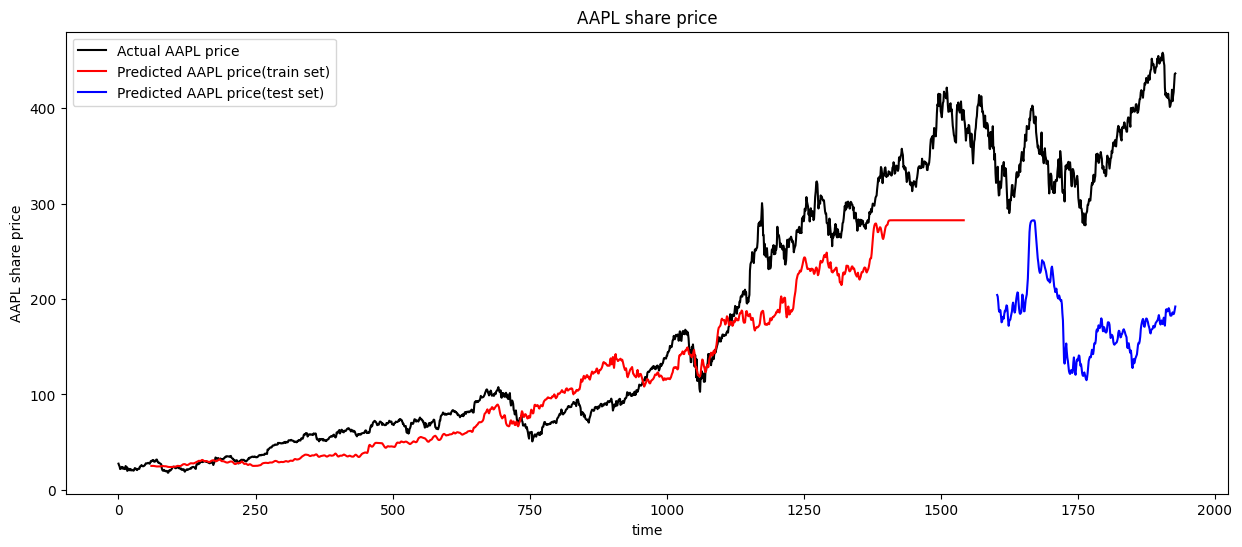

In [ ]:
# Set the number of previous time steps to consider for plotting
look_back = 60

# Initialize an array for plotting the train predictions
trainPredictPlot = np.empty_like(new_datasetAAPL)
trainPredictPlot[:] = np.nan
# Assign the predicted values to the appropriate location for train predictions
trainPredictPlot[look_back:len(train_predictions_list[4])+look_back] = train_predictions_list[4].flatten()

# Initialize an array for plotting the test predictions
testPredictPlot = np.empty_like(new_datasetAAPL)
testPredictPlot[:] = np.nan
# Calculate the starting index for the test predictions
test_start = len(new_datasetAAPL) - len(test_predictions_list[4])
# Assign the predicted values to the appropriate location for test predictions
testPredictPlot[test_start:] = test_predictions_list[4].flatten()

# Rescale the scaled data back to its original scale using the scaler
original_scaled_data = scaler.inverse_transform(scaled_datasetAAPL)

# Plotting the baseline data, training predictions, and test predictions
plt.figure(figsize=(15, 6))
plt.plot(original_scaled_data, color='black', label=f"Actual AAPL price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted AAPL price(train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted AAPL price(test set)")

plt.title(f"AAPL share price")
plt.xlabel("time")
plt.ylabel(f"AAPL share price")
plt.legend()
plt.show()
